# Time Series Forecasting Fundamentals with TensorFlow + Milestone Project: BitPredict

Let's write some TensorFlow code to predict the price of Bitcoin based on historical price of Bitcoin.

## Importing time series with pandas

In [11]:
# Import with pandas
import pandas as pd
# Let's read in our Bitcoin data and parse the dates
df = pd.read_csv('./bitcoin_price.csv',
                 parse_dates=['Date'],
                 index_col=['Date']) # parse the date column and tell pandas column 1 is a datetime

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [12]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [14]:
# How many samples do we have?
len(df)

2787

We have collected the historical price of Bitcoin for the past ~8 years but there's 2787 samples.

Typically deep learning models usually like lots and lots and lots of samples (where lots and lots and lots can be thousands to tens of thousands to millions).

A smaller number of samples is something you will often run into with time series of ata problems.

**Note:** The **seasonality** of a time series dataset is referred as the nmber of samples per year. So for our Bitcoin data, it has seasonality of daily or value of 365 because we collect one sample per day meaning we will get 365 samples per year.

In [15]:
# Only want closing price for each day
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


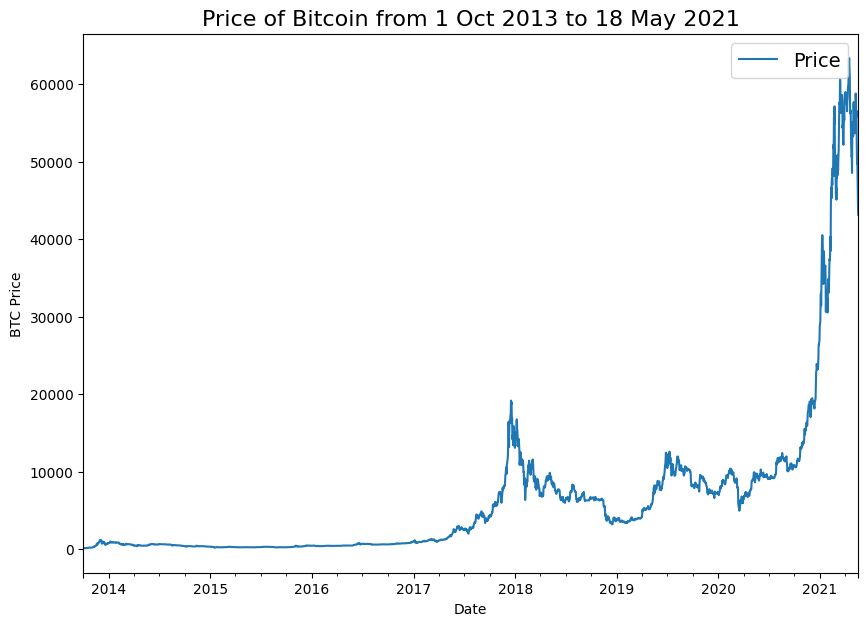

In [16]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16)
plt.legend(fontsize=14)
plt.show()

## Importing time series data with Pyhton's CSV module

In [17]:
# Importing and formatting historical Bitcoin data with Python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("bitcoin_price.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader) # Skip the header
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings)
        btc_price.append(float(line[2])) # get the bitcoin price as float

# View first 10 of each
timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

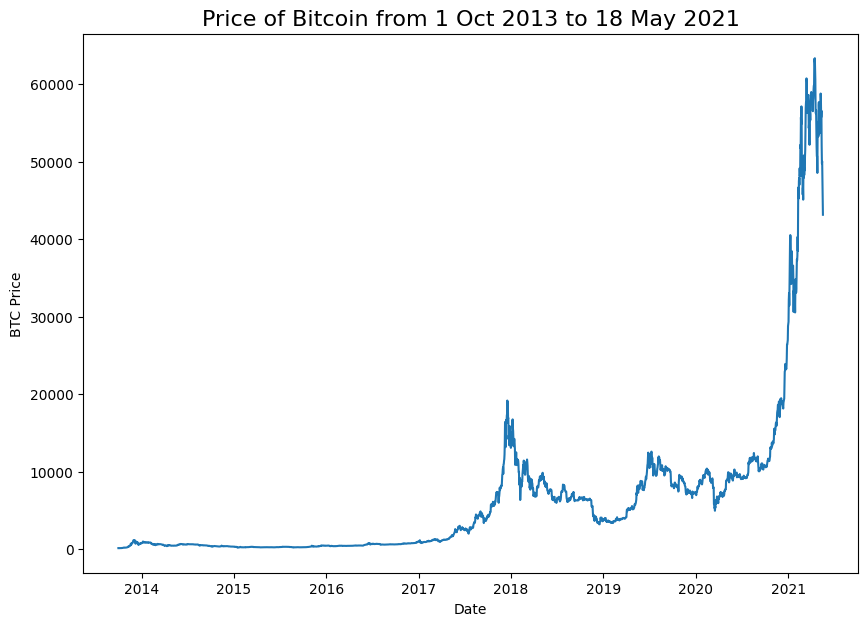

In [18]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from 1 Oct 2013 to 18 May 2021', fontsize=16)
plt.xlabel('Date')
plt.show()

## Format data part 1: Create train and test sets of our time series data

### Creating train and test sets with time series data (the wrong way)

In [19]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [20]:
# Wrong way to make train/test sets for time series data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # BTC price
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

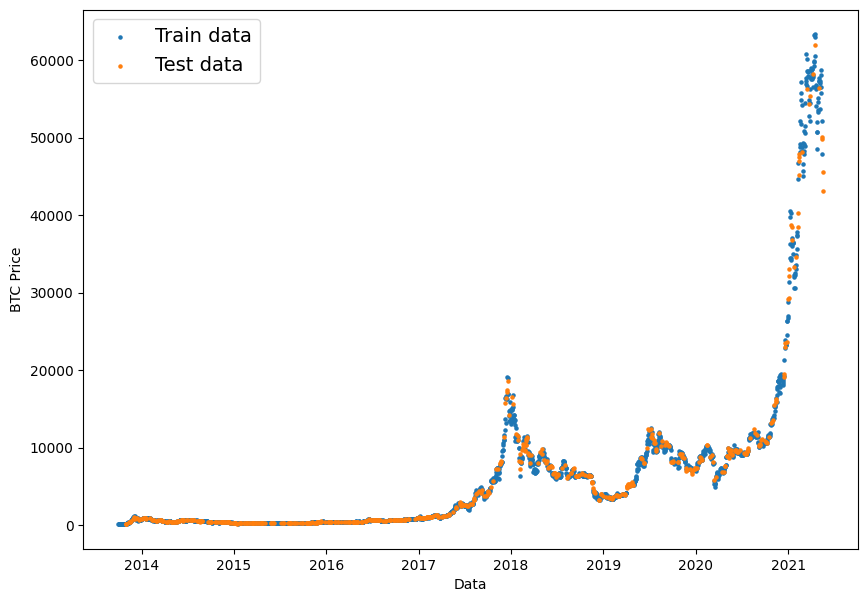

In [21]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Data')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show()

### Create train and test sets for time series (the right way)

In [22]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the splits)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything beyond the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

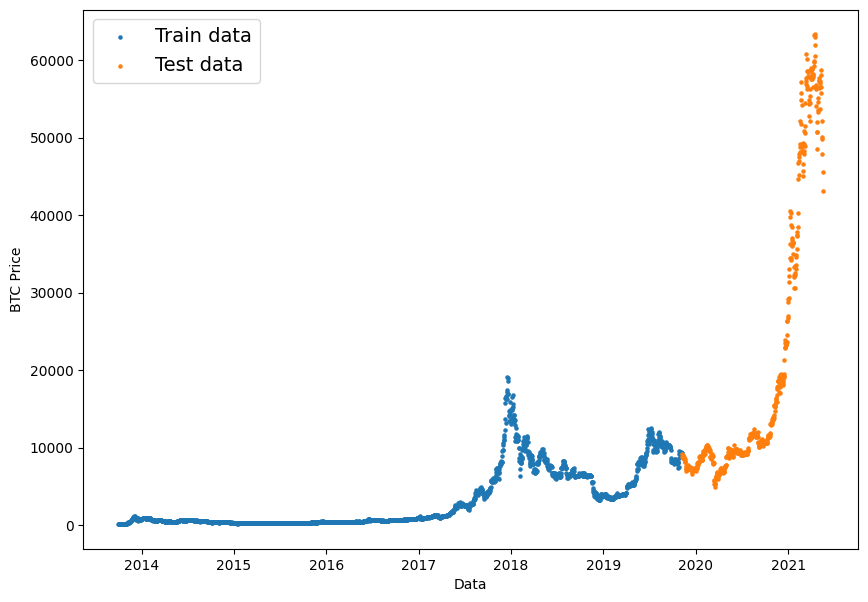

In [23]:
# Plto with the correctly splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Data')
plt.ylabel('BTC Price')
plt.legend(fontsize=14)
plt.show()

## Create a plotting function

In [24]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
    """
    Plots timesteps (a series of points in time) against values (a series of values across timesteps).

    Parameters:
    -----------
    timesteps: array of timestep values
    values: array of values across time
    format: style of plot, default "."
    start: where to start the plot (setting a value will index from start of timesteps and values)
    end: where to end the plot
    label: label to show on plot about values
    """
    # Plot the series
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

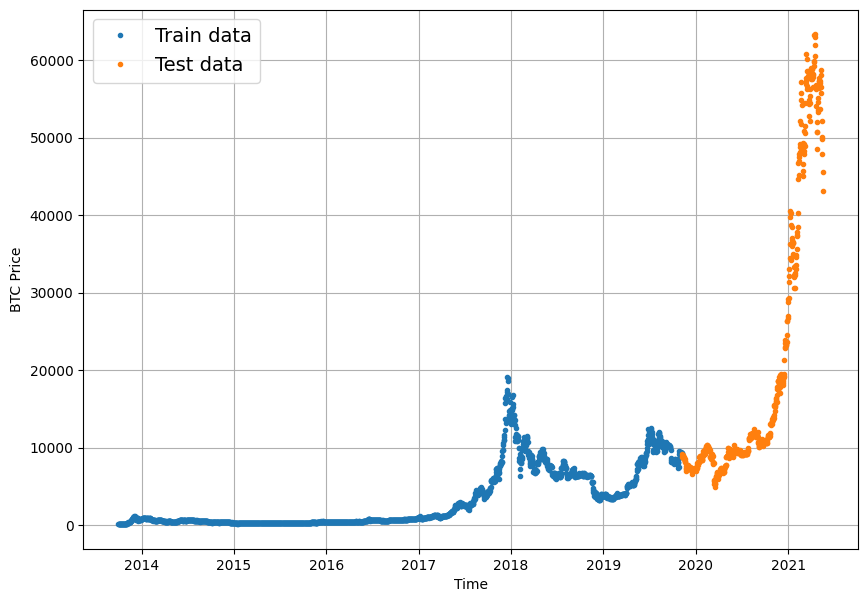

In [25]:
# Test out plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

## Modelling Experiments

We have got some Bitcoin historical data, to model it, let's run a series of modelling experiments and see which model performs best.

Terms to be familiar with:

* **Horizon** = number of timesteps into the future we are going to predict
* **Window size** = number of timesteps we are going to use to predict **horizon**

Modelling experiments we are running:

1. Naïve model (baseline)
2. Dense Model, horizon = 1, window = 7
3. Dense Model, horizon = 1, window = 30
4. Dense Model, horizon = 7, window = 30
5. Conv1D
6. LSTM
7. Dense Model, horizon = 1, window = 7 (but with multivariate data)
8. N-BEATs Algorithm
9. Ensemble (multiple models optimized stacked together)
10. Future prediction model
11. Dense Model (but with turkey data introduced) 

## Model 0: Naive forecast (baseline)

The formula looks like this:

$$\hat{y}_{t} = y_{t-1}$$

In English:

> The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (previous step) - this is for horizon of 1.

In [26]:
# Create a naive forecast
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

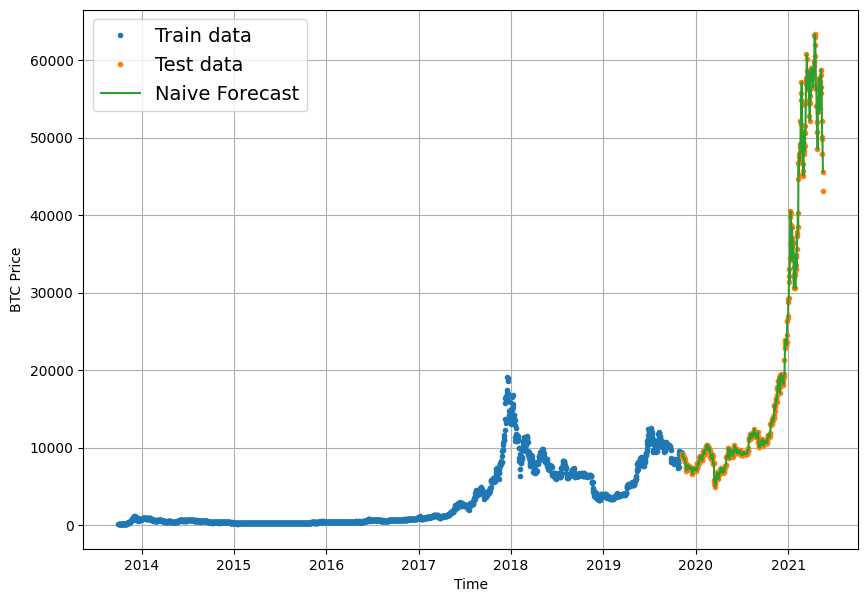

In [27]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive Forecast")

## Evaluating a time series model

Let's look into some evaluation metrics for time series forecasting.

What are we doing? We are predicting a number, so that means we have a form of a regression problem.

Because we are working on a regression problem, we will need some regression-like metrics.

A few common regression metrics which can also be used for time series forecasting:

* MAE - mean absolute error
* MSE - mean squared error
* RMSE - root mean square error
* MAPE - mean absolute percentage error
* MASE - mean absolute scaled error

For all the above metrics, **lower is better**.

The main thing we are evaluating here is: **how do our model's forecast (y_pred) compare against the actual values (y_true or ground truth values)?** 

In [28]:
import tensorflow as tf

In [29]:
# MASE implementation
def mean_absolute_scaled_error(y_true, y_pred):
    """
    Implement MASE (assuming no seasonality of data).
    """
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # Find MAE of naive forecast (no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shift of 1)

    return mae / mae_naive_no_season

In [30]:
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9995699939182624

In [31]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
    # Make sure float32 datatype (for metric calculation)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [32]:
# Let's now see if it works
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [33]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [34]:
tf.reduce_min(y_test), tf.reduce_max(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>,
 <tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>)

## Others Models for Time Series Forecasting

In this notebook we are going to use only neural networks for time series forecasting, but there are a plenty of models used in the industry or as a baseline model you can use.

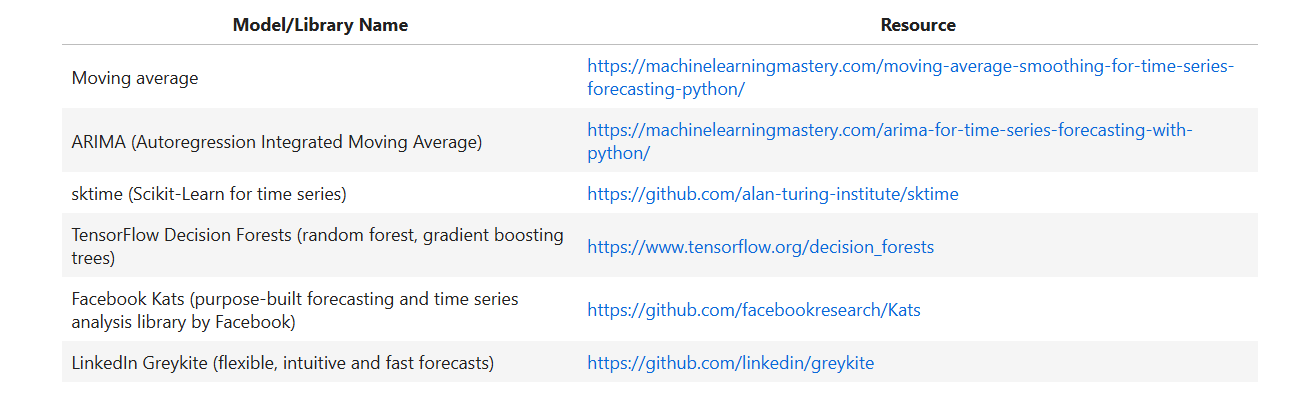

## Format Data Part 2: Windowing our dataset

Why do we window?

We window our time series dataset to turn our data into a supervised learning problem.

```
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] --> [7]
[1, 2, 3, 4, 5, 6, 7] --> [8]
[2, 3, 4, 5, 6, 7, 8] --> [9]
```

In [35]:
len(y_train)

2229

In [36]:
# What we want to do with our Bitcoin data
print(f"We want to use: {btc_price[:7]} to predict this: {btc_price[7]}")

We want to use: [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this: 123.033


In [37]:
# Let's setup global variables for window and horizon size
HORIZON = 1 # predict next 1 day
WINDOW_SIZE = 7 # use the past week of Bitcoin data to make the prediction

In [38]:
# Create function to label window data
def get_labelled_windows(x, horizon=HORIZON):
    """
    Creates labels for windowed dataset.

    E.g. if horizon = 1 --> Input: [0, 1, 2, 3, 4, 5, 6, 7] --> Output: ([0, 1, 2, 3, 4, 5, 6, 7], [7])
    """
    return x[:, :-horizon], x[:, -horizon:]

In [39]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis = 0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


We have got a way to label our windowed data.

However, this only works on a small scale.

We need a way to do the above across our entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we will leverage NumPy's array indexing.

Our function will:
1. Create a window step of specific window size.
2. It will numpy indexing to create a 2D array of multiple window steps, for example:
```
[
    [0, 1, 2, 3, 4, 5, 6],
    [1, 2, 3, 4, 5, 6, 7],
    [2, 3, 4, 5, 6, 7, 8]
]
```
3. Uses the 2D array of multiple window steps (from 2.) to index on a target series.
4. Uses our `get_labelled_windows()` function we created above to turn the window steps into windows with specified horizon.

In [40]:
import numpy as np

# Create function to view NumPy arrays as windows
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    """
    Turns a 1D into a 2D array of sequential labelled windows of window_size with horizon size labels.
    """
    # 1. Create a window of specific window_size (add the horzion on the end for labelling later)
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

    # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T # create 2D array of windows of size window_siz

    # 3. Index on the target array (a time series) with 2D array of multiple window steps
    windowed_array = x[window_indexes]

    # 4. Get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels

In [41]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [42]:
# View the first 3 windows/labels
for i in range(3):
    print(f'Window: {full_windows[i]} -> Label: {full_labels[i]}')

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [43]:
# View the last 3 windows/labels
for i in range(3):
    print(f'Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}')

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


## Turning windows into training and test sets

In [44]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
    """
    Splits matching pairs of windows and labels into train an test splits.
    """
    splits_size = int(len(windows) * (1 - test_split)) # this will default 80% train / 20% test
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [45]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 551, 2229, 551)

In [46]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-6]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

Because our model's performance will fluctuate from experiment to experiment, we're going to write a model checkpoint so we can compare apples to apples.

More specifically, we want to compare each of our model's best performances against the other model's best performances.

For example if our model performs the best on epoch 55 (but we are training for 100 epochs), we want to load and evaluate the model saved on epoch 55.

We can create modelling checkpoint callback using the following: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

In [47]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path='model_experiments'):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              monitor='val_loss',
                                              verbose=0, # only output a limited amount of text
                                              save_best_only=True)

## Model 1: Dense Model (window = 7, horizon = 1)

Our first deep model is going to be a simple dense model:

* A single dense layer with 128 hidden units and ReLU
* An output layer with linear activation (no activation)
* Adam optimization and MAE loss function
* Batch size of 128 (previously we have used 32)
* 100 epochs

Why these values?

I picked them out of experimentation.

In [48]:
import tensorflow as tf
from tensorflow.keras import layers # type: ignore

# Set random seed for as reporducible results as possible
tf.random.set_seed(42)

# 1. Construct the model
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON, activation='linear')
], name='model_1_dense') # name our model so we can save it

# 2. Compile
model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])

# Fit the model
model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 [==============================] - 5s 47ms/step - loss: 1135.8452 - mae: 1135.8452 - mse: 4885987.5000 - val_loss: 3274.8044 - val_mae: 3274.8044 - val_mse: 23164326.0000
Epoch 2/100
18/18 [==============================] - 0s 29ms/step - loss: 280.0155 - mae: 280.0155 - mse: 321710.2500 - val_loss: 941.4615 - val_mae: 941.4615 - val_mse: 2982832.0000
Epoch 3/100
18/18 [==============================] - 0s 27ms/step - loss: 172.1088 - mae: 172.1088 - mse: 153778.9062 - val_loss: 907.2452 - val_mae: 907.2452 - val_mse: 2695964.2500
Epoch 4/100
18/18 [==============================] - 0s 27ms/step - loss: 158.5242 - mae: 158.5242 - mse: 139460.2031 - val_loss: 901.5514 - val_mae: 901.5514 - val_mse: 2604872.5000
Epoch 5/100
18/18 [==============================] - 0s 6ms/step - loss: 155.9169 - mae: 155.9169 - mse: 131412.3125 - val_loss: 902.8134 - val_mae: 902.8134 - val_mse: 2544695.5000
Epoch 6/100
18/18 [==============================] - 1s 29ms/step - loss: 152.68

In [49]:
# Evaluate model on test data (last performance - not the best)
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 643.6832 - mae: 643.6832 - mse: 1346662.8750


[643.6832275390625, 643.6832275390625, 1346662.875]

In [50]:
# Load in saved best performing model_1 and evaluate it on test data
model_1 = tf.keras.models.load_model('model_experiments/model_1_dense/')
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 574.2059 - mae: 574.2059 - mse: 1181832.8750


[574.2059326171875, 574.2059326171875, 1181832.875]

## Making forecasts with a model (on the test dataset)

To make 'forecasts' on the dataset (note: these won't be actual forecasts, they're only pseudo forecasts actual forecasts are into the future), let's write a function to:

1. Take in a train model
2. Takes in some input data (same kind of data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions

In [51]:
def make_preds(model, input_data):
    """
    Uses model to make predictions input_data.
    """
    forecast = model.predict(input_data)
    return tf.squeeze(forecast) # return 1D array of predictions

In [52]:
# Make predictions using model_1 on the test dataset and view results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(551,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8766.644 , 8691.325 , 8503.815 , 8473.878 , 8538.975 , 8243.26  ,
        8107.648 , 8078.878 , 7670.2837, 7298.751 ], dtype=float32)>)

In [53]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 574.206,
 'mse': 1181832.9,
 'rmse': 1087.1213,
 'mape': 2.57856,
 'mase': 1.0021904}

In [54]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

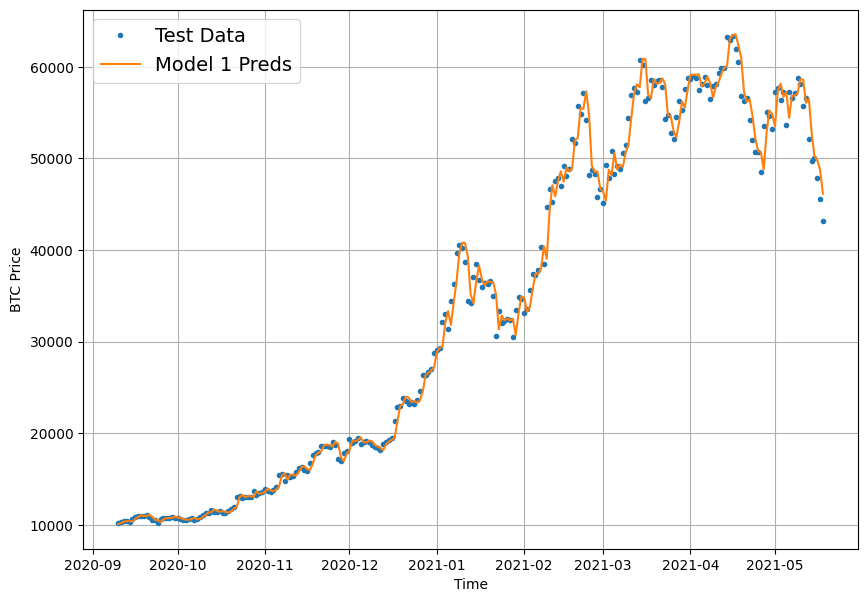

In [55]:
# Let's plot our model 1 predictions
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test Data')

plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format='-', label='Model 1 Preds')

## Model 2: Dense (window = 30, horizon = 1)

In [56]:
HORIZON = 1 # predict one step at a time (one day of Bitcoin prices)
WINDOW_SIZE = 30 # use 30 timesteps in past

In [57]:
# Make window data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [58]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 528, 2229, 528)

In [59]:
tf.random.set_seed(42)

# Create model
model_2 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_2_dense')

# Compile model
model_2.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_dense\assets
INFO:tensorflow:Assets written to: mod

In [60]:
# Evaluate model 2 on test data
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 626.5184


626.5184326171875

In [61]:
# Load in the best performing model
model_2 = tf.keras.models.load_model('model_experiments/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 626.5184


626.5184326171875

In [62]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

17/17 [==============================] - 0s 2ms/step


In [63]:
tf.squeeze(test_labels).shape, model_2_preds.shape

(TensorShape([528]), TensorShape([528]))

In [64]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 626.51843,
 'mse': 1346910.6,
 'rmse': 1160.5648,
 'mape': 2.736351,
 'mase': 1.0604308}

In [65]:
model_1_results

{'mae': 574.206,
 'mse': 1181832.9,
 'rmse': 1087.1213,
 'mape': 2.57856,
 'mase': 1.0021904}

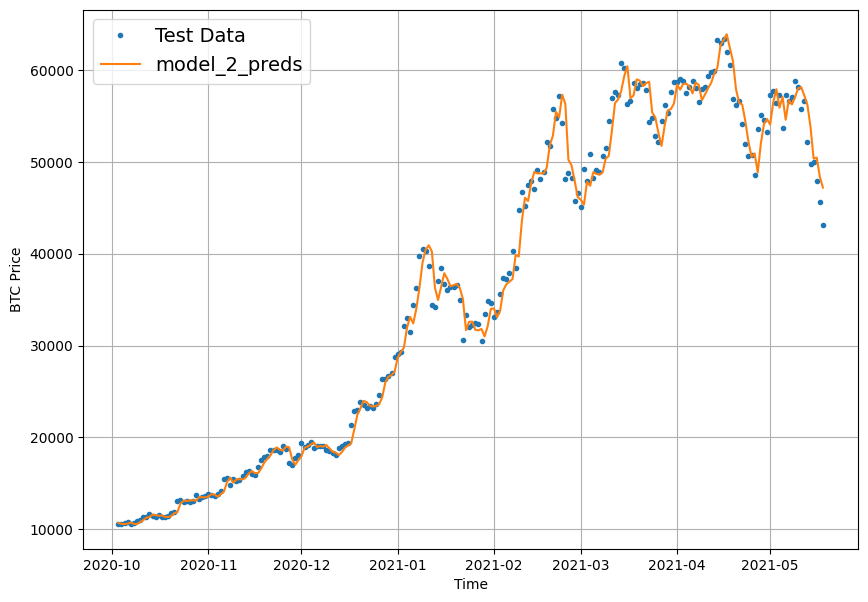

In [66]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for test_window offset when plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format='-', label='model_2_preds')

## Model 3: Dense (window = 30, horizon = 7)



In [67]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [68]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows,
                                                                                labels=full_labels,
                                                                                test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2229, 522, 2229, 522)

In [69]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(HORIZON)
], name='model_3_dense')

# Compile
model_3.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_dense\assets
INFO:tensorflow:Assets written to: mod

In [70]:
# Evaluate the model on the test data
model_3.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 2ms/step - loss: 1325.2842


1325.2841796875

In [71]:
# Load best version of model_3 and evaluate
model_3 = tf.keras.models.load_model('model_experiments/model_3_dense/')
model_3.evaluate(test_windows, test_labels)

17/17 [==============================] - 0s 3ms/step - loss: 1289.4144


1289.4144287109375

In [72]:
# Make predictions with model_3
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds.shape

17/17 [==============================] - 0s 2ms/step


TensorShape([522, 7])

In [73]:
model_3_preds.shape, model_2_preds.shape

(TensorShape([522, 7]), TensorShape([528]))

In [74]:
# Evaluate model_3 results
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([  143.81145 ,   258.2098  ,   416.77603 ,   320.20697 ,
          353.1294  ,   319.0523  ,   280.56033 ,   319.81674 ,
          243.34326 ,   250.60086 ,   288.63776 ,   464.4248  ,
           80.65932 ,    91.933876,    82.29681 ,   137.72816 ,
          182.10066 ,   114.5775  ,    84.6778  ,    50.42962 ,
           69.07359 ,   122.683525,   152.69398 ,   238.9532  ,
          250.25914 ,   273.15506 ,   344.83344 ,   491.539   ,
          481.45584 ,   544.5902  ,   481.64746 ,   360.88443 ,
          266.20612 ,   324.0279  ,   392.09396 ,   373.75522 ,
          481.34662 ,   461.20773 ,   510.6353  ,   116.02218 ,
          165.74358 ,   260.17703 ,   495.38266 ,   594.381   ,
          482.48508 ,   348.1794  ,   425.31543 ,   415.61246 ,
          509.98257 ,   555.4993  ,   730.14923 ,   725.15344 ,
          519.76825 ,   226.56418 ,   177.14774 ,   306.27008 ,
          277.8704  ,   318.0978  ,   308.40903 ,   425.96094 ,
          564.9833  ,   466.40918

## Make our evaluation function work for larger horizons

In [75]:
# Create a function to take in model predictions and truth values and return evaluation metrics
def evaluate_preds(y_true, y_pred):
    # Make sure float32 datatype (for metric calculation)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # Account for different sized metrics (for longer horizons, we want to reduce metrics to a single value)
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }

In [76]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1289.4144,
 'mse': 5635686.5,
 'rmse': 1482.7789,
 'mape': 5.621021,
 'mase': 2.2046313}

We have made and evaluated predictions with `model_3`, let's visualize visualize visualize!

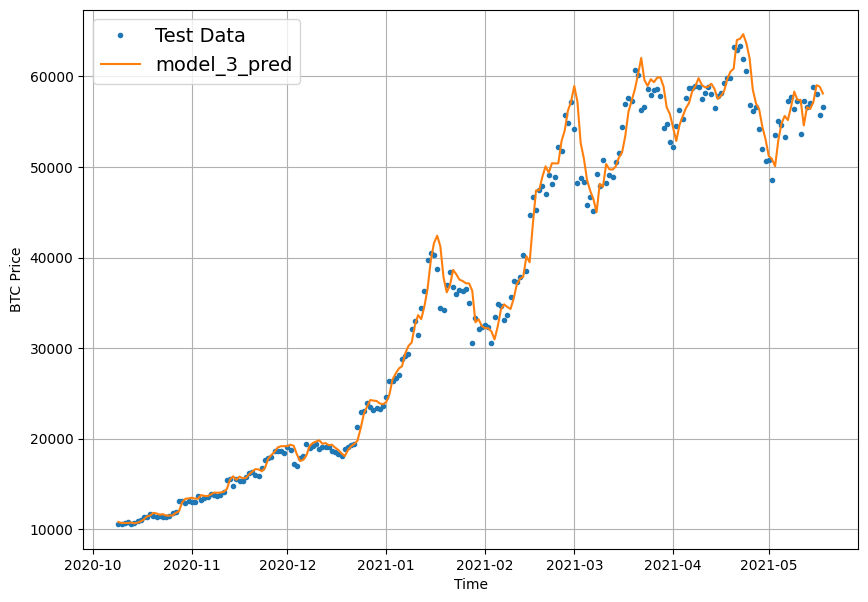

In [77]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label='Test Data')
plot_time_series(timesteps=X_test[-len(test_windows):], values=tf.reduce_mean(model_3_preds, axis=1), format='-', start=offset, label='model_3_pred')

## Which of our models is performing the best so far?

So we have trained a few models, now let's compare them and see how they have gone...

<Axes: >

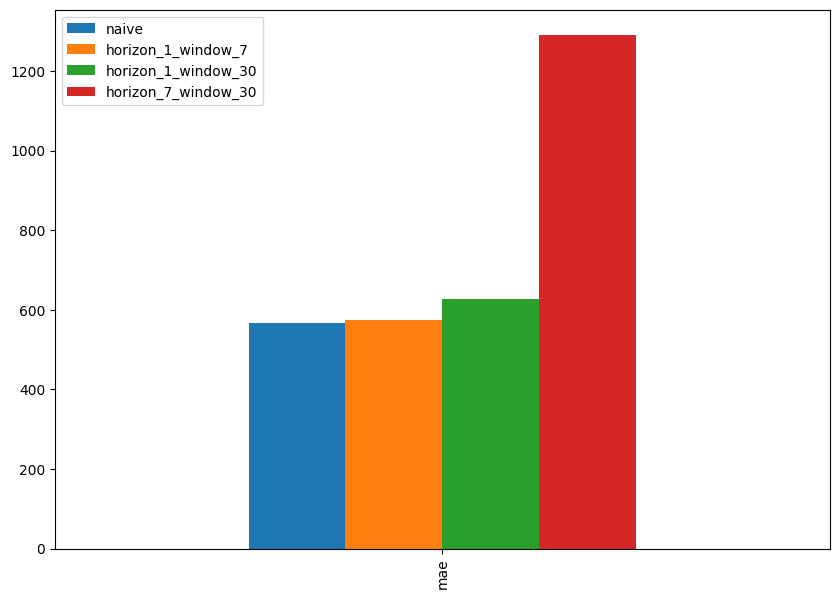

In [78]:
pd.DataFrame({'naive': naive_results['mae'],
              'horizon_1_window_7': model_1_results['mae'],
              'horizon_1_window_30': model_2_results['mae'],
              'horizon_7_window_30': model_3_results['mae']}, index=['mae']).plot(figsize=(10, 7), kind='bar')

## Model 4: Conv1D

In [79]:
HORIZON = 1 # predict next day of Bitcoin prices
WINDOW_SIZE = 7 # use previous week worth data

In [80]:
# Create windowed data
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [81]:
# Create train/test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(train_labels), len(test_windows), len(test_labels)

(2229, 2229, 551, 551)

To use the Conv1D layer, we need an input shape of: `(batch_size, timesteps, input_dim)`... However, our data isn't in that shape yet.

In [82]:
# Check data input shape
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [83]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works 
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [84]:
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension to our layer

In [85]:
# Test out our lambda layer
print(f'Original shape: {x.shape}') # (WINDOW_SIZE)
print(f'Expanded shape: {expand_dims_layer(x).shape}')
print(f'Original values with expanded shape:\n {expand_dims_layer(x)}')

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [86]:
tf.random.set_seed(42)

# Create Conv1D model
model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(filters=128, kernel_size=5, strides=1, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
], name='model_4_conv1D')

# Compile model
model_4.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


INFO:tensorflow:Assets written to: model_experiments\model_4_conv1D\assets


In [87]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [88]:
# Evaluate model
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 592.3100


592.3099975585938

In [89]:
# Load back in best performing Conv1D and re-evaluate
model_4 = tf.keras.models.load_model('model_experiments/model_4_conv1D')
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 577.3591


577.359130859375

In [90]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:5]

18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8738.189, 8677.277, 8530.121, 8468.781, 8511.952], dtype=float32)>

In [91]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 577.35913,
 'mse': 1198927.6,
 'rmse': 1094.9554,
 'mape': 2.568825,
 'mase': 1.0076936}

In [92]:
model_1_results

{'mae': 574.206,
 'mse': 1181832.9,
 'rmse': 1087.1213,
 'mape': 2.57856,
 'mase': 1.0021904}

## Model 5: RNN (LSTM)

Let's build an RNN model for our time series data.

In [95]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
# x = layers.LSTM(128, return_sequences=True)(x)
x = layers.LSTM(128, activation='relu')(x)
# x = layers.Dense(32, activation='relu')(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name='model_5_LSTM')

# Compile
model_5.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2189.9604INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 122ms/step - loss: 2189.9604 - val_loss: 6191.7930
Epoch 2/100
15/18 [========================>.....] - ETA: 0s - loss: 386.4305INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 108ms/step - loss: 361.6512 - val_loss: 1085.4780
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 194.1043INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 109ms/step - loss: 193.8651 - val_loss: 1001.9092
Epoch 4/100
16/18 [=========================>....] - ETA: 0s - loss: 179.3025INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 138ms/step - loss: 175.6858 - val_loss: 989.6917
Epoch 5/100
14/18 [======================>.......] - ETA: 0s - loss: 172.3440INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 171.8895 - val_loss: 902.6443
Epoch 6/100
18/18 [==============================] - 0s 9ms/step - loss: 174.0112 - val_loss: 963.4396
Epoch 7/100
18/18 [==============================] - 0s 9ms/step - loss: 171.5993 - val_loss: 953.9120
Epoch 8/100
18/18 [==============================] - 0s 9ms/step - loss: 164.6311 - val_loss: 979.5765
Epoch 9/100
18/18 [==============================] - 0s 8ms/step - loss: 161.1079 - val_loss: 950.6109
Epoch 10/100
18/18 [==============================] - 0s 8ms/step - loss: 163.3182 - val_loss: 956.5178
Epoch 11/100
18/18 [==============================] - 0s 9ms/step - loss: 167.6195 - val_loss: 929.5983
Epoch 12/100
18/18 [==============================] - 0s 9ms/step - loss: 164.0659 - val_loss: 929.0605
Epoch 13/100
18/18 [==============================] - 0s 8ms/step - loss: 161.0479 - val_loss: 910.6470
Epoch 14/100
18/18 [==============================] - 0s 8ms/step - loss: 158.4

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 100ms/step - loss: 156.4805 - val_loss: 878.3056
Epoch 16/100
16/18 [=========================>....] - ETA: 0s - loss: 157.0743INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 110ms/step - loss: 155.7207 - val_loss: 861.0991
Epoch 17/100
16/18 [=========================>....] - ETA: 0s - loss: 149.9959INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 150.9781 - val_loss: 843.2569
Epoch 18/100
18/18 [==============================] - 0s 10ms/step - loss: 149.1897 - val_loss: 892.6342
Epoch 19/100
18/18 [==============================] - 0s 8ms/step - loss: 147.4700 - val_loss: 846.9094
Epoch 20/100
17/18 [===========================>..] - ETA: 0s - loss: 146.9738INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 103ms/step - loss: 146.5530 - val_loss: 809.5121
Epoch 21/100
18/18 [==============================] - 0s 9ms/step - loss: 143.4911 - val_loss: 810.6983
Epoch 22/100
10/18 [===============>..............] - ETA: 0s - loss: 139.4335INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 105ms/step - loss: 141.9371 - val_loss: 791.9445
Epoch 23/100
16/18 [=========================>....] - ETA: 0s - loss: 146.1322INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 109ms/step - loss: 141.6448 - val_loss: 774.5535
Epoch 24/100
18/18 [==============================] - 0s 8ms/step - loss: 137.8608 - val_loss: 848.4227
Epoch 25/100
10/18 [===============>..............] - ETA: 0s - loss: 139.2839INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 109ms/step - loss: 140.8379 - val_loss: 751.5679
Epoch 26/100
17/18 [===========================>..] - ETA: 0s - loss: 135.3444INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 112ms/step - loss: 134.7615 - val_loss: 746.1588
Epoch 27/100
18/18 [==============================] - 0s 9ms/step - loss: 133.9509 - val_loss: 803.3377
Epoch 28/100
18/18 [==============================] - 0s 8ms/step - loss: 134.1188 - val_loss: 764.2947
Epoch 29/100
18/18 [==============================] - ETA: 0s - loss: 131.7543INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 148ms/step - loss: 131.7543 - val_loss: 721.5516
Epoch 30/100
16/18 [=========================>....] - ETA: 0s - loss: 131.3570INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 128.0503 - val_loss: 710.7826
Epoch 31/100
16/18 [=========================>....] - ETA: 0s - loss: 130.5240INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 128.7123 - val_loss: 701.0707
Epoch 32/100
18/18 [==============================] - 0s 9ms/step - loss: 127.8564 - val_loss: 772.5844
Epoch 33/100
10/18 [===============>..............] - ETA: 0s - loss: 118.1262INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 103ms/step - loss: 126.5352 - val_loss: 689.4875
Epoch 34/100
18/18 [==============================] - 0s 9ms/step - loss: 126.6761 - val_loss: 690.5028
Epoch 35/100
10/18 [===============>..............] - ETA: 0s - loss: 125.2262INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 102ms/step - loss: 128.1393 - val_loss: 681.5829
Epoch 36/100
14/18 [======================>.......] - ETA: 0s - loss: 124.9612INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 112ms/step - loss: 124.6641 - val_loss: 669.6057
Epoch 37/100
16/18 [=========================>....] - ETA: 0s - loss: 122.7758INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 108ms/step - loss: 121.5595 - val_loss: 664.4518
Epoch 38/100
18/18 [==============================] - 0s 9ms/step - loss: 121.3102 - val_loss: 665.2495
Epoch 39/100
16/18 [=========================>....] - ETA: 0s - loss: 122.4199INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 121.1115 - val_loss: 654.1576
Epoch 40/100
15/18 [========================>.....] - ETA: 0s - loss: 117.5400INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 118.8919 - val_loss: 648.8994
Epoch 41/100
18/18 [==============================] - 0s 11ms/step - loss: 118.5616 - val_loss: 650.1866
Epoch 42/100
18/18 [==============================] - 0s 8ms/step - loss: 118.6909 - val_loss: 665.9080
Epoch 43/100
18/18 [==============================] - 0s 8ms/step - loss: 127.0567 - val_loss: 681.6004
Epoch 44/100
18/18 [==============================] - 0s 9ms/step - loss: 119.8721 - val_loss: 681.0242
Epoch 45/100
18/18 [==============================] - 0s 8ms/step - loss: 117.7206 - val_loss: 657.5804
Epoch 46/100
11/18 [=================>............] - ETA: 0s - loss: 119.0523INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 134ms/step - loss: 116.1489 - val_loss: 630.3196
Epoch 47/100
18/18 [==============================] - 0s 9ms/step - loss: 117.8434 - val_loss: 635.3748
Epoch 48/100
18/18 [==============================] - 0s 8ms/step - loss: 123.4238 - val_loss: 786.3798
Epoch 49/100
18/18 [==============================] - 0s 8ms/step - loss: 122.8299 - val_loss: 649.6817
Epoch 50/100
 9/18 [==============>...............] - ETA: 0s - loss: 114.8668INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 102ms/step - loss: 118.2702 - val_loss: 629.6241
Epoch 51/100
18/18 [==============================] - 0s 14ms/step - loss: 116.0760 - val_loss: 638.9875
Epoch 52/100
15/18 [========================>.....] - ETA: 0s - loss: 116.6500INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 114.8721 - val_loss: 617.5654
Epoch 53/100
18/18 [==============================] - 0s 10ms/step - loss: 114.1204 - val_loss: 644.7651
Epoch 54/100
16/18 [=========================>....] - ETA: 0s - loss: 113.7988INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 114.8939 - val_loss: 613.6993
Epoch 55/100
18/18 [==============================] - 0s 9ms/step - loss: 118.5015 - val_loss: 639.4553
Epoch 56/100
18/18 [==============================] - 0s 8ms/step - loss: 115.4934 - val_loss: 660.3280
Epoch 57/100
18/18 [==============================] - 0s 8ms/step - loss: 118.4106 - val_loss: 620.4612
Epoch 58/100
11/18 [=================>............] - ETA: 0s - loss: 111.8796INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 100ms/step - loss: 114.3024 - val_loss: 612.5217
Epoch 59/100
18/18 [==============================] - 0s 12ms/step - loss: 114.5854 - val_loss: 660.6876
Epoch 60/100
15/18 [========================>.....] - ETA: 0s - loss: 122.6947INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 124.7796 - val_loss: 608.0854
Epoch 61/100
18/18 [==============================] - 0s 9ms/step - loss: 112.2460 - val_loss: 633.1053
Epoch 62/100
11/18 [=================>............] - ETA: 0s - loss: 123.4880INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 101ms/step - loss: 118.2585 - val_loss: 602.9578
Epoch 63/100
15/18 [========================>.....] - ETA: 0s - loss: 117.4044INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 103ms/step - loss: 119.2994 - val_loss: 602.6296
Epoch 64/100
18/18 [==============================] - 0s 13ms/step - loss: 117.1553 - val_loss: 603.7565
Epoch 65/100
14/18 [======================>.......] - ETA: 0s - loss: 116.0031INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 105ms/step - loss: 112.8833 - val_loss: 599.1768
Epoch 66/100
18/18 [==============================] - 0s 9ms/step - loss: 111.4424 - val_loss: 610.8740
Epoch 67/100
18/18 [==============================] - 0s 9ms/step - loss: 113.5912 - val_loss: 600.2056
Epoch 68/100
 9/18 [==============>...............] - ETA: 0s - loss: 120.0804INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 3s 150ms/step - loss: 113.1707 - val_loss: 598.1463
Epoch 69/100
18/18 [==============================] - 0s 9ms/step - loss: 110.4715 - val_loss: 601.3045
Epoch 70/100
18/18 [==============================] - 0s 10ms/step - loss: 112.3586 - val_loss: 615.3661
Epoch 71/100
18/18 [==============================] - 0s 9ms/step - loss: 113.7006 - val_loss: 653.0480
Epoch 72/100
 9/18 [==============>...............] - ETA: 0s - loss: 107.9279INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 112.3022 - val_loss: 593.4352
Epoch 73/100
18/18 [==============================] - 0s 10ms/step - loss: 110.9320 - val_loss: 593.8560
Epoch 74/100
18/18 [==============================] - 0s 9ms/step - loss: 111.6230 - val_loss: 608.6721
Epoch 75/100
18/18 [==============================] - 0s 9ms/step - loss: 111.5845 - val_loss: 625.9244
Epoch 76/100
18/18 [==============================] - 0s 8ms/step - loss: 113.8380 - val_loss: 643.3133
Epoch 77/100
 9/18 [==============>...............] - ETA: 0s - loss: 115.6266INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 102ms/step - loss: 109.7983 - val_loss: 592.3455
Epoch 78/100
16/18 [=========================>....] - ETA: 0s - loss: 111.0733INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 105ms/step - loss: 109.3512 - val_loss: 592.0400
Epoch 79/100
18/18 [==============================] - 0s 10ms/step - loss: 110.2757 - val_loss: 615.7544
Epoch 80/100
18/18 [==============================] - 0s 11ms/step - loss: 111.4073 - val_loss: 644.9332
Epoch 81/100
17/18 [===========================>..] - ETA: 0s - loss: 111.7389INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 106ms/step - loss: 112.2993 - val_loss: 586.1948
Epoch 82/100
18/18 [==============================] - 0s 11ms/step - loss: 110.9327 - val_loss: 596.1505
Epoch 83/100
18/18 [==============================] - 0s 9ms/step - loss: 108.9392 - val_loss: 637.9977
Epoch 84/100
18/18 [==============================] - 0s 8ms/step - loss: 112.8433 - val_loss: 617.4685
Epoch 85/100
18/18 [==============================] - 0s 8ms/step - loss: 110.7041 - val_loss: 607.3933
Epoch 86/100
18/18 [==============================] - 0s 8ms/step - loss: 110.1143 - val_loss: 592.3998
Epoch 87/100
11/18 [=================>............] - ETA: 0s - loss: 105.8479INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 96ms/step - loss: 109.1909 - val_loss: 584.3700
Epoch 88/100
18/18 [==============================] - 0s 9ms/step - loss: 108.3864 - val_loss: 602.6306
Epoch 89/100
18/18 [==============================] - 0s 9ms/step - loss: 108.5007 - val_loss: 608.0246
Epoch 90/100
18/18 [==============================] - 0s 8ms/step - loss: 110.5716 - val_loss: 587.1043
Epoch 91/100
18/18 [==============================] - 0s 8ms/step - loss: 112.1085 - val_loss: 602.4138
Epoch 92/100
18/18 [==============================] - 0s 8ms/step - loss: 111.2275 - val_loss: 585.6669
Epoch 93/100
18/18 [==============================] - 0s 8ms/step - loss: 111.2881 - val_loss: 619.1137
Epoch 94/100
18/18 [==============================] - 0s 8ms/step - loss: 110.2711 - val_loss: 591.5469
Epoch 95/100
18/18 [==============================] - 0s 8ms/step - loss: 109.2154 - val_loss: 640.4066
Epoch 96/100
11/18 [=================>............] - ETA: 0s - loss: 118.87

INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 104ms/step - loss: 112.1913 - val_loss: 580.5602
Epoch 97/100
15/18 [========================>.....] - ETA: 0s - loss: 108.0683INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_experiments\model_5_LSTM\assets


18/18 [==============================] - 2s 116ms/step - loss: 107.7021 - val_loss: 580.4796
Epoch 98/100
18/18 [==============================] - 0s 9ms/step - loss: 109.0035 - val_loss: 614.9943
Epoch 99/100
18/18 [==============================] - 0s 13ms/step - loss: 110.5458 - val_loss: 582.5190
Epoch 100/100
18/18 [==============================] - 0s 8ms/step - loss: 115.0034 - val_loss: 815.7179


In [96]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model('model_experiments/model_5_LSTM')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 580.4796


580.4795532226562

In [97]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)

18/18 [==============================] - 0s 2ms/step


In [98]:
# Evaluate model 5 predictions
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)

In [99]:
model_5_results

{'mae': 580.47955,
 'mse': 1213124.9,
 'rmse': 1101.4194,
 'mape': 2.6002626,
 'mase': 1.0131398}

In [100]:
model_1_results

{'mae': 574.206,
 'mse': 1181832.9,
 'rmse': 1087.1213,
 'mape': 2.57856,
 'mase': 1.0021904}